## **캘리포니아 주택 가격 예측하기**

### 1.데이터 로드하고 전처리하기
- 라이브러리 가져오기

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

- 데이터 로드하기

In [2]:
housing = fetch_california_housing()

In [3]:
dir(housing)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [4]:
df1 = pd.DataFrame(housing.data, columns= [housing.feature_names])
df2 = pd.DataFrame(housing.target, columns =[housing.target_names])
df = pd.concat([df1, df2], axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 캘리포니아 주택 가격 데이터

- `MedInc`: 블록 그룹의 중간 소득을 나타냅니다. 이는 가구의 소득 중간값을 말하며, 일반적으로 수천 달러 단위로 표시됩니다.
- `HouseAge`: 블록 그룹 내 주택의 중간 연령을 나타냅니다. 이는 해당 지역의 주택들이 얼마나 오래되었는지를 나타내는 지표입니다.
- `AveRooms`: 블록 그룹 내 평균 방의 갯수를 나타냅니다.
- `AveBedrms`: 블록 그룹 내 평균 침실의 갯수를 나타냅니다.
- `Population`: 블록 그룹의 인구를 나타냅니다.
- `AveOccup`: 평균 거주자 수를 나타냅니다. 이는 주택 한 채당 평균 거주하는 사람의 수를 말합니다.
- `Latitude`: 해당 블록 그룹의 위도를 나타냅니다.
- `Longitude`: 해당 블록 그룹의 경도를 나타냅니다.
- `MedHouseVal`: 블록 그룹의 중간 주택 가치를 나타냅니다. 이는 타겟 변수로서 주택 가격의 중간값을 나타내며, 일반적으로 수십만 달러 단위로 표시됩니다.

In [5]:
X = housing.data         # ... 코드 입력
y = housing.target        # ... 코드 입력

- 학습용/검증용/테스트 데이터셋 분리하기

In [6]:
# 전체 데이터 => 학습용/테스트용 데이터로 분리하기 (random_state=42 지정)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)        # ... 코드 입력

print(X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape)

# 학습용 데이터 => 학습용/검증용 데이터로 분리하기(random_state=42 지정)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)        # ... 코드 입력
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(16512, 8) (4128, 8) (16512,) (4128,)
(13209, 8) (3303, 8) (13209,) (3303,)


- 데이터 전처리하기 - 스케일링하기
    - fit() 단계: 데이터의 각 특성(컬럼)에 대한 평균(mean)과 표준편차(standard deviation)를 계산해요. 이런 통계치는 데이터를 스케일링할 때 사용.
    - transform() 단계: fit()에서 계산한 평균과 표준편차를 사용해 데이터를 변환. 구체적으로, 각 특성의 값에서 평균을 빼고 그 결과를 표준편차로 나눠줌으로써 데이터를 스케일링. 이 메서드는 학습 데이터에 대해 사용. 학습 데이터를 기준으로 데이터셋의 스케일을 조정하는 통계치를 계산하고, 이를 바탕으로 학습/검증/테스트 데이터셋을 변환.

In [7]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)         # ... 코드 입력
X_valid_scaled = scaler.transform(X_valid)         # ... 코드 입력
X_test_scaled = scaler.transform(X_test)         # ... 코드 입력

- 랜덤 씨드 설정하기

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
X_train_scaled.shape

(13209, 8)

### 2.모델 구성하고 학습하기

- 모델 구성하기

In [10]:
# input_shape 선언하고
# 2개의 은닉층과 각 은닉층은 30개의 노드로 구성된 회귀 모델을 구성합니다.

input_shape = (X_train_scaled.shape[1],)         # ... 코드 입력
model = keras.models.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                270       
                                                                 
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


- 모델 컴파일하기

In [11]:
# loss = "mean_squared_error", optimizer = 'SGD(learning_rate=1e-3)'로 지정
model.compile(optimizer='SGD', loss='mse', metrics=['MSE'] )      # ... 코드 입력

- 모델 학습하기

In [12]:
# 학습 데이터, epochs = 20, 검증용 데이터 지정하여 학습한 후 결과를 history에 저장하기
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_valid_scaled, y_valid))   # ... 코드 입력

Epoch 1/20
413/413 [==============================] - 2s 3ms/step - loss: 0.8460 - MSE: 0.8460 - val_loss: 0.5480 - val_MSE: 0.5480
Epoch 2/20
413/413 [==============================] - 1s 2ms/step - loss: 0.4804 - MSE: 0.4804 - val_loss: 0.4579 - val_MSE: 0.4579
Epoch 3/20
413/413 [==============================] - 1s 2ms/step - loss: 0.4220 - MSE: 0.4220 - val_loss: 0.4290 - val_MSE: 0.4290
Epoch 4/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3930 - MSE: 0.3930 - val_loss: 0.4224 - val_MSE: 0.4224
Epoch 5/20
413/413 [==============================] - 1s 3ms/step - loss: 0.3796 - MSE: 0.3796 - val_loss: 0.4140 - val_MSE: 0.4140
Epoch 6/20
413/413 [==============================] - 1s 3ms/step - loss: 0.3719 - MSE: 0.3719 - val_loss: 0.3842 - val_MSE: 0.3842
Epoch 7/20
413/413 [==============================] - 1s 3ms/step - loss: 0.3611 - MSE: 0.3611 - val_loss: 0.3850 - val_MSE: 0.3850
Epoch 8/20
413/413 [==============================] - 1s 3ms/step - loss: 0.

### 3.모델 평가하고 예측하기

In [13]:
# 테스트 데이터로 평가하기
mse_test = model.evaluate(X_test_scaled, y_test)    # ... 코드 입력

# 테스트 데이터로 예측하기
X_new = X_test[:3]
y_pred = model.predict(X_test_scaled)    # ... 코드 입력
y_pred

129/129 [==============================] - 0s 1ms/step


array([[0.733111 ],
       [1.3472829],
       [4.412881 ],
       ...,
       [4.802952 ],
       [0.7887906],
       [1.6513159]], dtype=float32)

### 4.학습 과정 살펴보기

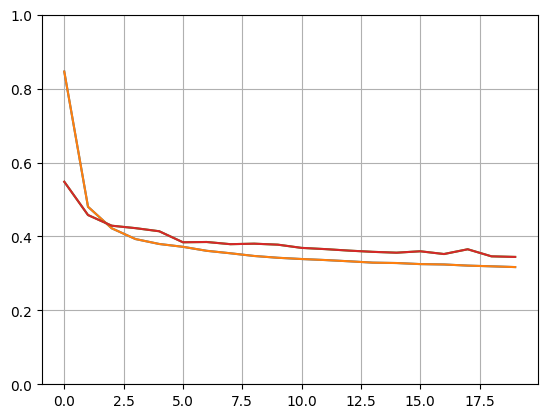

In [14]:
# 방법1
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

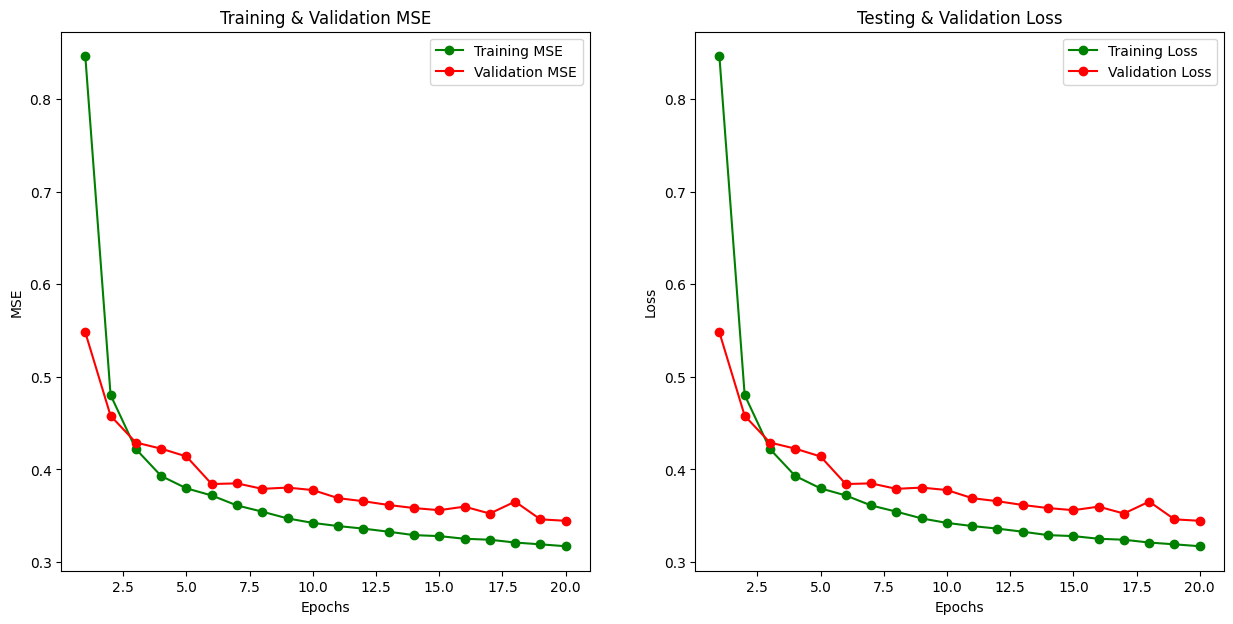

In [15]:
# 학습과정 나타내기 방법2
fig , ax = plt.subplots(1,2)
train_acc = history.history['MSE']
train_loss = history.history['loss']
val_acc = history.history['val_MSE']
val_loss = history.history['val_loss']
fig.set_size_inches(15,7)

epochs = range(1, len(train_acc) + 1)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training MSE')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation MSE')
ax[0].set_title('Training & Validation MSE')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("MSE")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

### 5.저장 및 불러오기

In [ ]:
# 모델 구성하기
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
# 모델 컴파일하기 : optimizer='sgd', loss='mean_squared_error', metrics=['accuracy']
model.compile(loss=...  # ... 코드 입력

# 모델 학습하기
history = ...         # ... 코드 입력

# 모델 평가하기
mse_test = ...         # ... 코드 입력

# 모델 예측하기
model.predict(X_new)

- 모델 저장하고 불러우고

In [16]:
#model.save("my_keras_model.h5")
#model = keras.models.load_model("my_keras_model.h5")

model.save("my_keras_model.keras")

model = keras.models.load_model("my_keras_model.keras")

### 6.훈련과정에서 콜백 사용하기

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

- 모델 구성하기

In [ ]:
model2 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

- 모델 컴파일하기

In [ ]:
model2.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:

# 조기 종료하기
early_stop = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
# 체크 포인트 저장하기
check_point = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# 콜백 적용하여 학습하기
history = model2.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[check_point, early_stop])